# Background averaging to segment untagged bees
- Use background average to get clearer view of untagged bees

In [1]:
%matplotlib inline
#plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 20, 16

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 2.7.12 64bit [GCC 5.4.0 20160609]
IPython 5.4.1
OS Linux 4.10.0 33 generic x86_64 with Ubuntu 16.04 xenial
numpy 1.13.1
scipy 0.19.1
matplotlib 2.0.2
pandas 0.20.3
Fri Sep 01 11:19:10 2017 AEST

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import cv2

import os
import sys

np.random.seed(0)

def view(image):
    plt.figure()
    plt.axis('off')
    plt.imshow(image, cmap = cm.Greys_r)

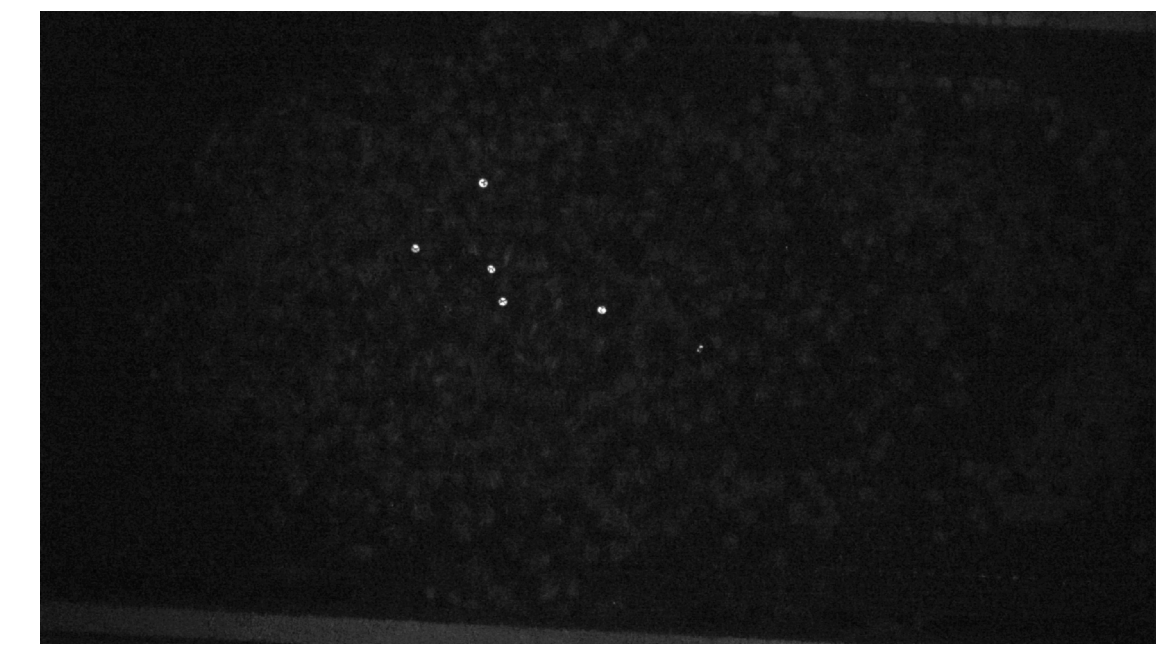

In [24]:
image = cv2.imread('/home/jack/Pictures/vlcsnap-2017-09-01-11h18m01s500.png', cv2.IMREAD_GRAYSCALE)
image = cv2.GaussianBlur(image, (9, 9), 0)
view(image)

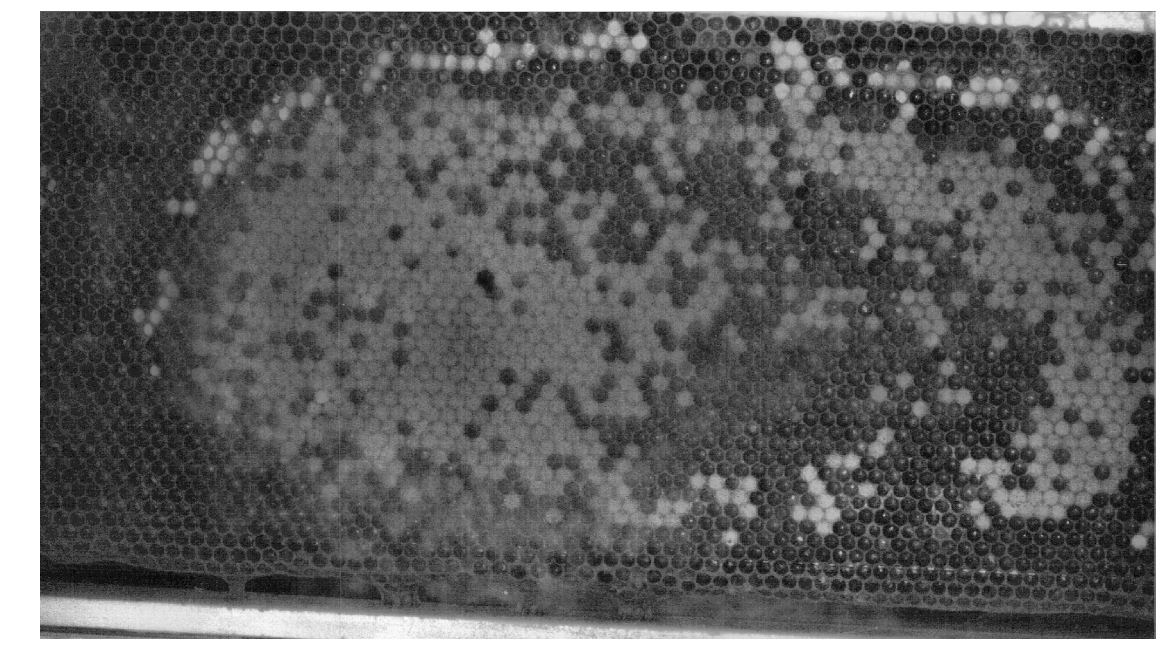

In [4]:
bg = cv2.imread('/home/jack/Pictures/0_0_night.png', cv2.IMREAD_GRAYSCALE)
view(bg)

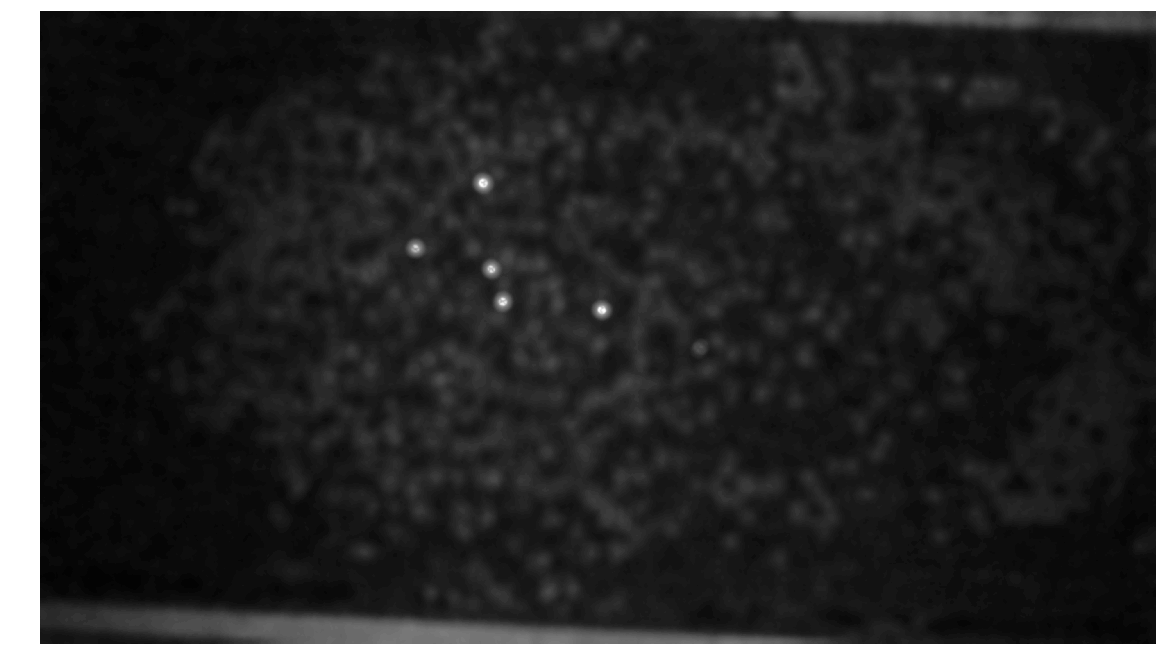

In [25]:
blur = cv2.bilateralFilter(image,55,155,155)
view(blur)

In [30]:
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,33,3)
#view(thresh)

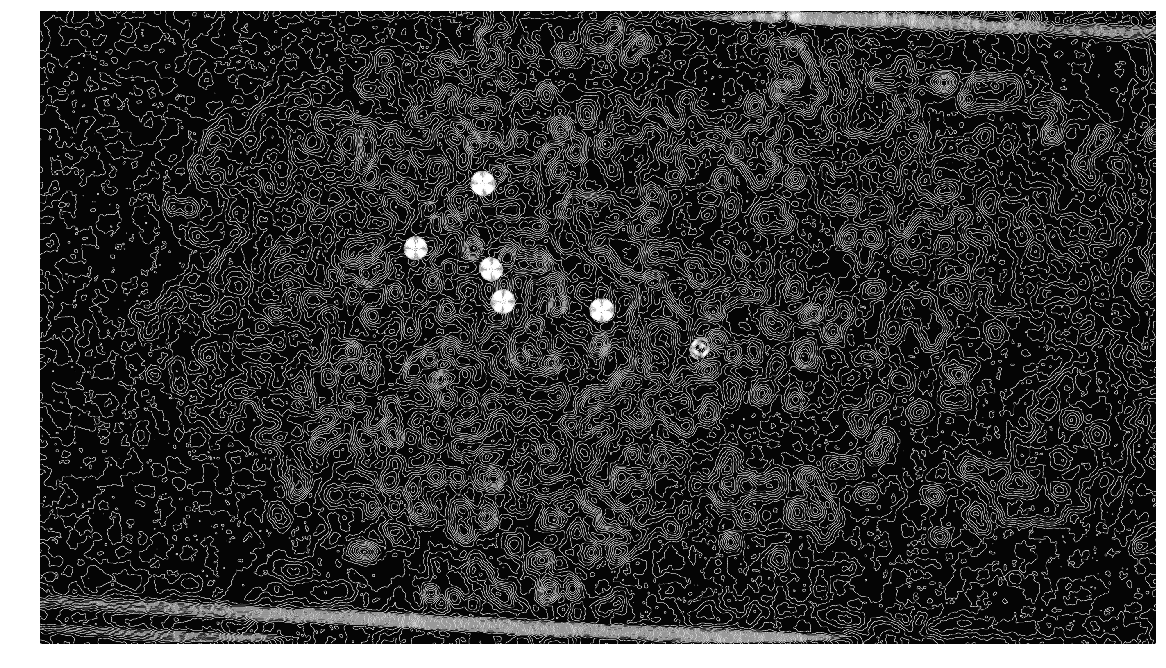

In [38]:
grad_x = cv2.Sobel(blur, cv2.CV_16S, 1, 0, ksize=5, scale=5, delta=5, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(blur, cv2.CV_16S, 0, 1, ksize=5, scale=5, delta=5, borderType=cv2.BORDER_DEFAULT)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
scharr = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
#ret, thresh = cv2.threshold(scharr, 70, 255, 0)
view(scharr)

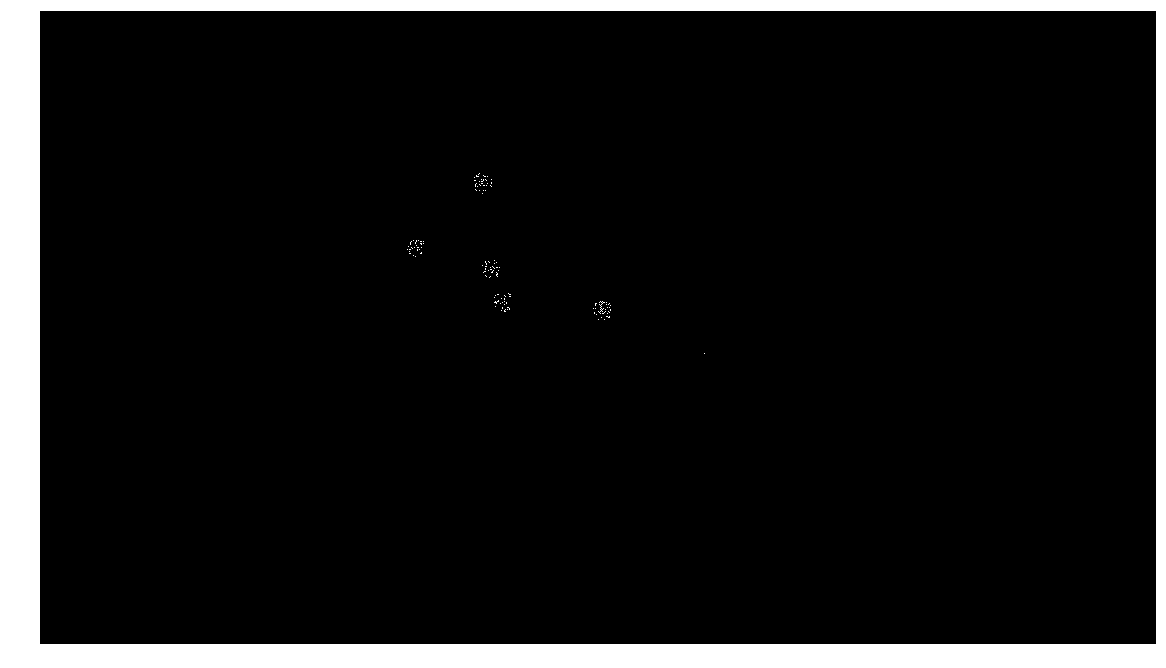

In [41]:
canny = cv2.Canny(blur, 11, 11)
view(canny)

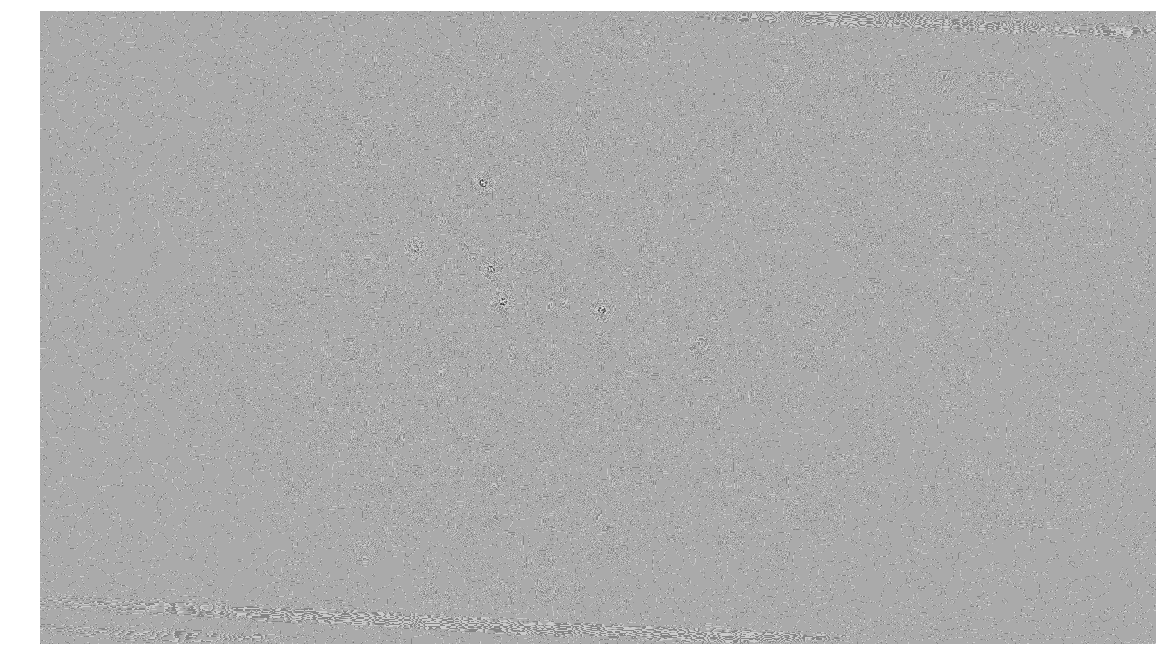

In [44]:
laplacian = cv2.Laplacian(blur,cv2.CV_64F, ksize=3, scale=1, delta=1)
view(laplacian)

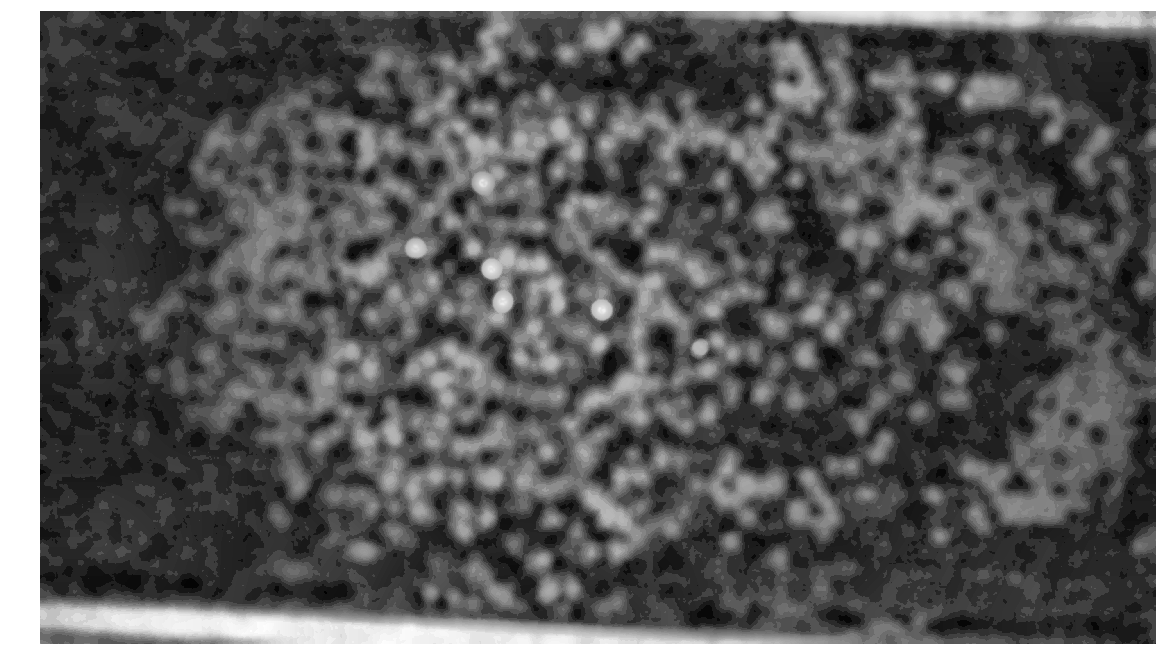

In [46]:
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(9,9))
clahe_img = clahe.apply(blur)
view(clahe_img)